In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import roc_auc_score, roc_curve, f1_score, accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import seaborn as sns
from impementation import *

In [2]:
df = pd.read_csv("credit_score_cleaned_train.csv")

In [3]:
df.shape

(96696, 28)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96696 entries, 0 to 96695
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        96696 non-null  object 
 1   customer_id               96696 non-null  object 
 2   month                     96696 non-null  object 
 3   name                      96696 non-null  object 
 4   age                       96696 non-null  int64  
 5   ssn                       96696 non-null  object 
 6   occupation                96696 non-null  object 
 7   annual_income             96696 non-null  float64
 8   monthly_inhand_salary     96696 non-null  float64
 9   credit_history_age        96696 non-null  int64  
 10  total_emi_per_month       96696 non-null  float64
 11  num_bank_accounts         96696 non-null  int64  
 12  num_credit_card           96696 non-null  int64  
 13  interest_rate             96696 non-null  int64  
 14  num_of

In [5]:
df.isnull().sum()

id                          0
customer_id                 0
month                       0
name                        0
age                         0
ssn                         0
occupation                  0
annual_income               0
monthly_inhand_salary       0
credit_history_age          0
total_emi_per_month         0
num_bank_accounts           0
num_credit_card             0
interest_rate               0
num_of_loan                 0
type_of_loan                0
delay_from_due_date         0
num_of_delayed_payment      0
changed_credit_limit        0
num_credit_inquiries        0
credit_mix                  0
outstanding_debt            0
credit_utilization_ratio    0
payment_of_min_amount       0
amount_invested_monthly     0
payment_behaviour           0
monthly_balance             0
credit_score                0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,age,annual_income,monthly_inhand_salary,credit_history_age,total_emi_per_month,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,amount_invested_monthly,monthly_balance,credit_score
count,96696.000000,96696.000000,96696.000000,96696.000000,96696.000000,96696.000000,96696.000000,96696.000000,96696.000000,96696.000000,96696.000000,96696.000000,96696.000000,96696.000000,96696.000000,96696.000000,96696.000000,96696.000000
mean,33.942448,50898.597475,4231.402393,78.471529,106.502641,5.319134,5.498211,14.347646,3.481344,20.806931,13.215180,10.294523,5.667690,1404.464296,32.302757,641.549306,405.811795,0.898889
std,10.377550,38543.773796,3207.836030,33.291894,130.404213,2.597916,2.057083,8.708524,2.435098,14.785004,6.277732,6.775430,3.846715,1148.594411,5.121575,2049.156494,215.518284,0.676131
min,16.000000,7006.035000,303.645420,-1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-5.000000,0.000000,-6.490000,0.000000,0.230000,20.000000,0.000000,0.007760,0.000000
25%,25.000000,19480.040000,1634.720800,53.000000,28.636501,3.000000,4.000000,7.000000,2.000000,10.000000,9.000000,5.220000,3.000000,555.670000,28.064556,74.984432,271.129822,0.000000
50%,34.000000,37367.340000,3116.120850,78.000000,65.712006,5.000000,5.000000,13.000000,3.000000,18.000000,14.000000,9.310000,5.000000,1142.390000,32.328069,136.521240,339.009780,1.000000
75%,42.000000,72245.760000,6016.623500,106.000000,145.756870,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,14.640000,8.000000,1891.100000,36.516658,268.072265,475.785608,1.000000
max,56.000000,179987.280000,15204.634000,147.000000,3776.000000,11.000000,11.000000,34.000000,9.000000,67.000000,28.000000,36.970000,17.000000,4998.070000,50.000000,10000.000000,1602.040500,2.000000


In [8]:
df.columns

Index(['id', 'customer_id', 'month', 'name', 'age', 'ssn', 'occupation',
       'annual_income', 'monthly_inhand_salary', 'credit_history_age',
       'total_emi_per_month', 'num_bank_accounts', 'num_credit_card',
       'interest_rate', 'num_of_loan', 'type_of_loan', 'delay_from_due_date',
       'num_of_delayed_payment', 'changed_credit_limit',
       'num_credit_inquiries', 'credit_mix', 'outstanding_debt',
       'credit_utilization_ratio', 'payment_of_min_amount',
       'amount_invested_monthly', 'payment_behaviour', 'monthly_balance',
       'credit_score'],
      dtype='object')

In [9]:
len(df['id'].unique()) == df.shape[0]

True

## Baseline

In [10]:
X = df.drop(columns=['credit_score'])
y = df['credit_score']

Переведем все категориальные фичи к числовым

In [11]:
cat_cols = []
for col in X.columns:
    if X[col].dtype == object:
        cat_cols.append(col)

In [12]:
cat_cols

['id',
 'customer_id',
 'month',
 'name',
 'ssn',
 'occupation',
 'type_of_loan',
 'credit_mix',
 'payment_of_min_amount',
 'payment_behaviour']

Переведем LabelEncoder для каждого столбца значения в числа

In [13]:
X_clean = X.copy()

In [14]:
for col in cat_cols:
    encoder = LabelEncoder()
    X_clean[col] = encoder.fit_transform(X_clean[col])

In [15]:
X_clean.head()

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,credit_history_age,...,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,payment_of_min_amount,amount_invested_monthly,payment_behaviour,monthly_balance
0,15942,11914,3,81,23,9872,12,19114.12,1824.8434,89,...,7,11.27,4,1,809.98,26.822620,0,80.415300,2,312.49408
1,15953,11914,2,81,23,9872,12,19114.12,1824.8434,93,...,7,11.27,4,1,809.98,31.944960,0,118.280220,3,284.62915
2,15964,11914,6,81,23,9872,12,19114.12,1824.8434,91,...,7,11.27,4,1,809.98,28.609352,0,81.699524,4,331.20987
3,15977,11914,0,81,23,9872,12,19114.12,1824.8434,92,...,4,6.27,4,1,809.98,31.377861,0,199.458070,5,223.45131
4,15988,11914,7,81,23,9872,12,19114.12,1824.8434,93,...,4,11.27,4,1,809.98,24.797346,0,41.420155,1,341.48923


Разделим выборку на train и test

In [16]:
train_X, test_X, train_y, test_y = train_test_split(X_clean,y, test_size=0.2, random_state=42)

In [17]:
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((77356, 27), (19340, 27), (77356,), (19340,))

In [18]:
model = KNeighborsClassifier(n_neighbors=3)

In [19]:
model.fit(train_X, train_y)

KNeighborsClassifier(n_neighbors=3)

In [20]:
predict_train = model.predict(train_X)
predict_test = model.predict(test_X)

In [21]:
print(f"accuracy_score на train: {accuracy_score(train_y, predict_train)}")
print(f"accuracy_score на test: {accuracy_score(test_y, predict_test)}")

print(f'f1_score на train: {f1_score(train_y, predict_train, average="macro")}')
print(f'f1_score на test: {f1_score(test_y, predict_test, average="macro")}')

accuracy_score на train: 0.8790397642070428
accuracy_score на test: 0.7806618407445708
f1_score на train: 0.8752187359484419
f1_score на test: 0.7731654715075359


## EDA

In [22]:
df.head()

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,credit_history_age,...,changed_credit_limit,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,payment_of_min_amount,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,89,...,11.27,4,Good,809.98,26.822620,No,80.415300,High_spent_Small_value_payments,312.49408,2
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,93,...,11.27,4,Good,809.98,31.944960,No,118.280220,Low_spent_Large_value_payments,284.62915,2
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,91,...,11.27,4,Good,809.98,28.609352,No,81.699524,Low_spent_Medium_value_payments,331.20987,2
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,92,...,6.27,4,Good,809.98,31.377861,No,199.458070,Low_spent_Small_value_payments,223.45131,2
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,93,...,11.27,4,Good,809.98,24.797346,No,41.420155,High_spent_Medium_value_payments,341.48923,2


## Numeric feature

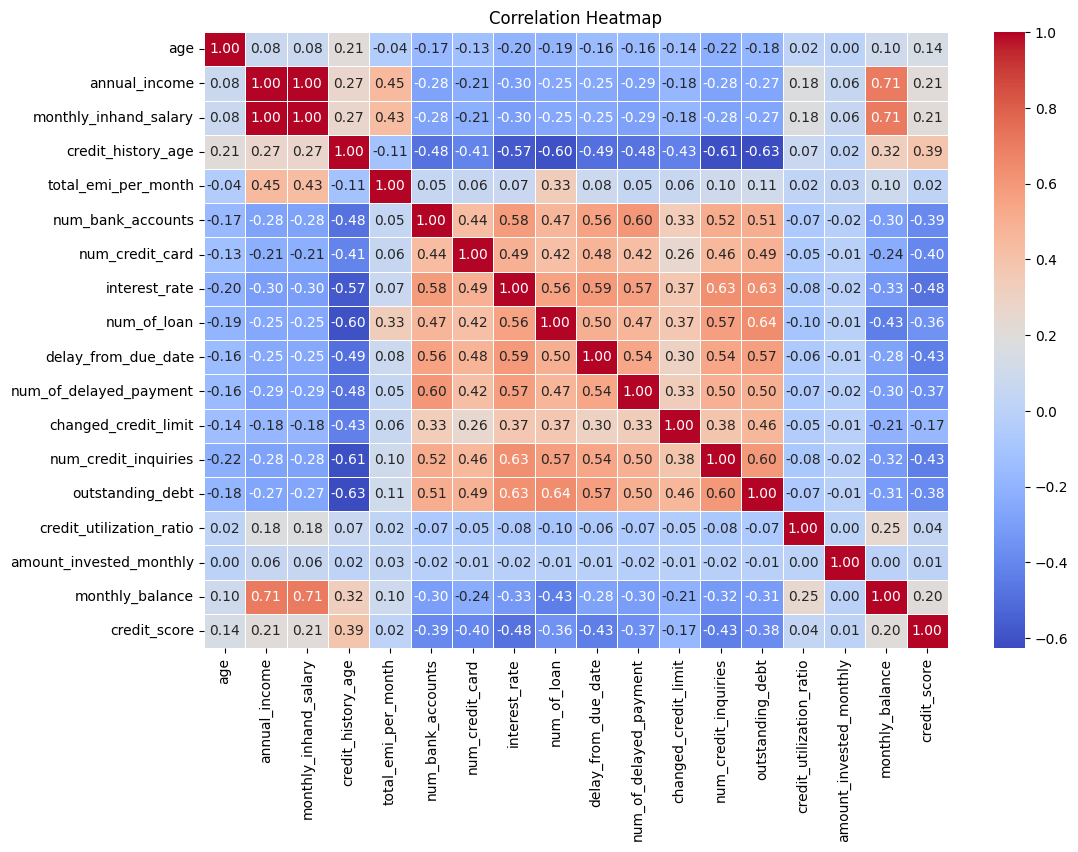

In [23]:
# Filter only numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# 5. Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

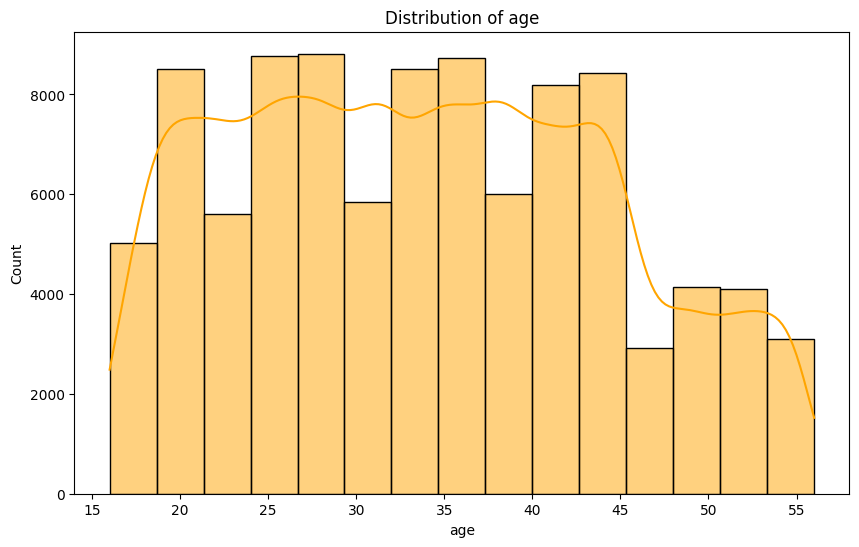

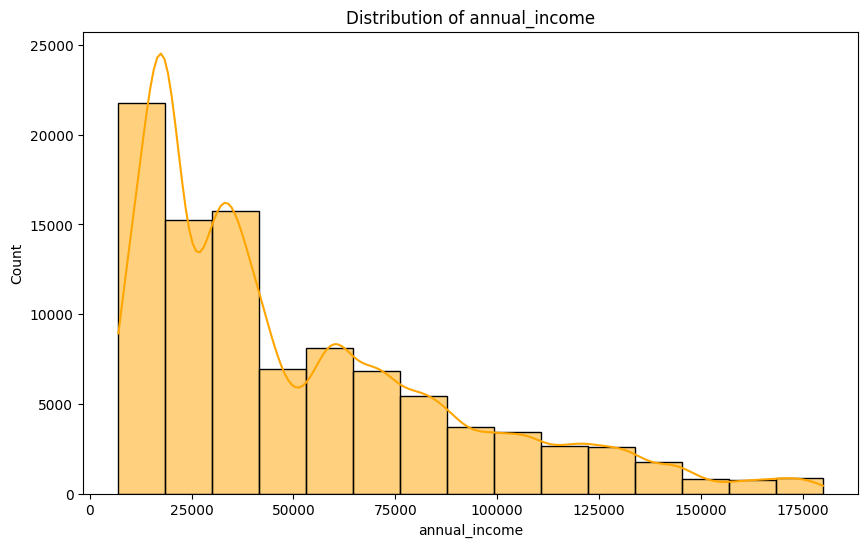

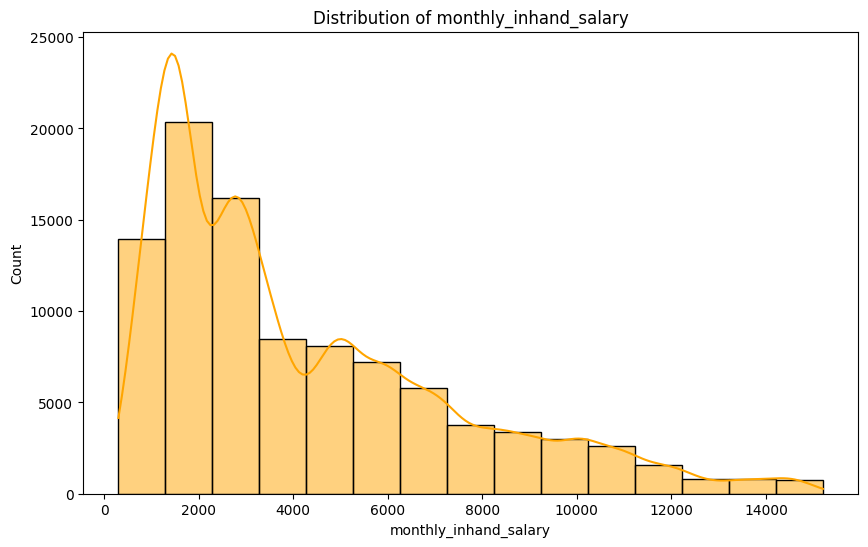

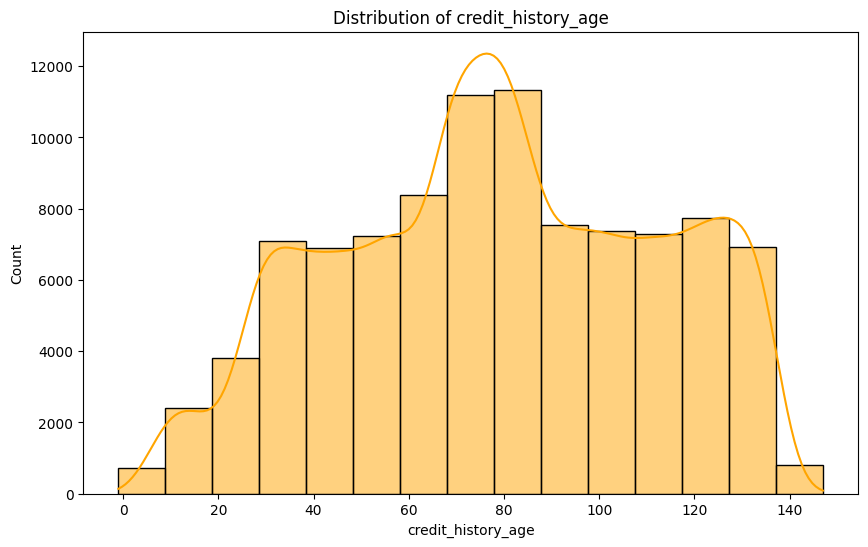

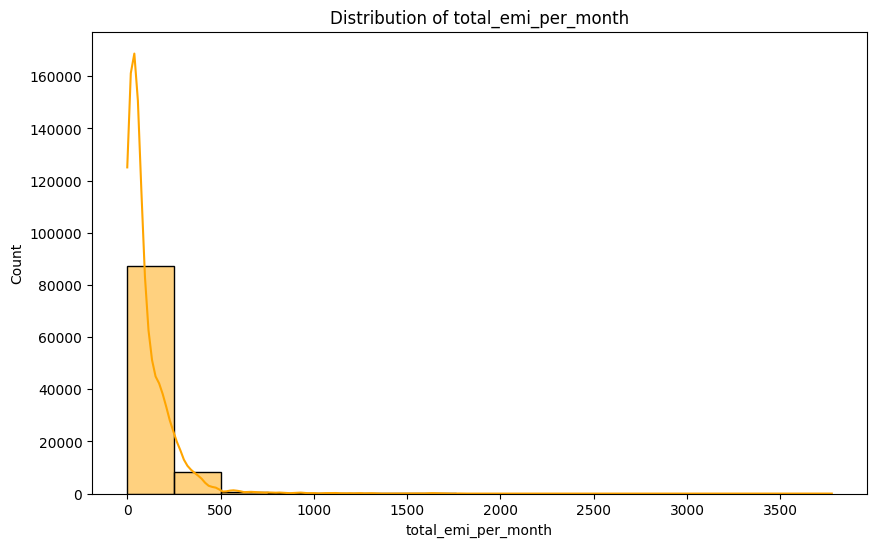

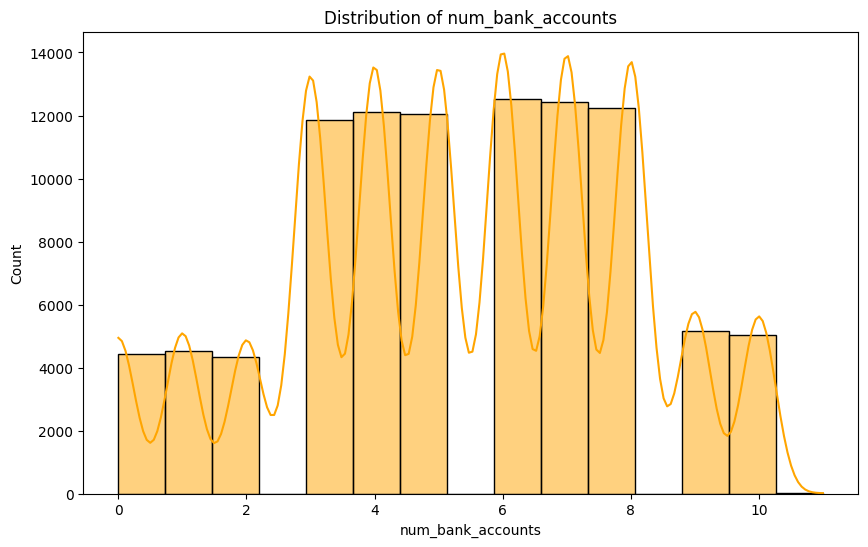

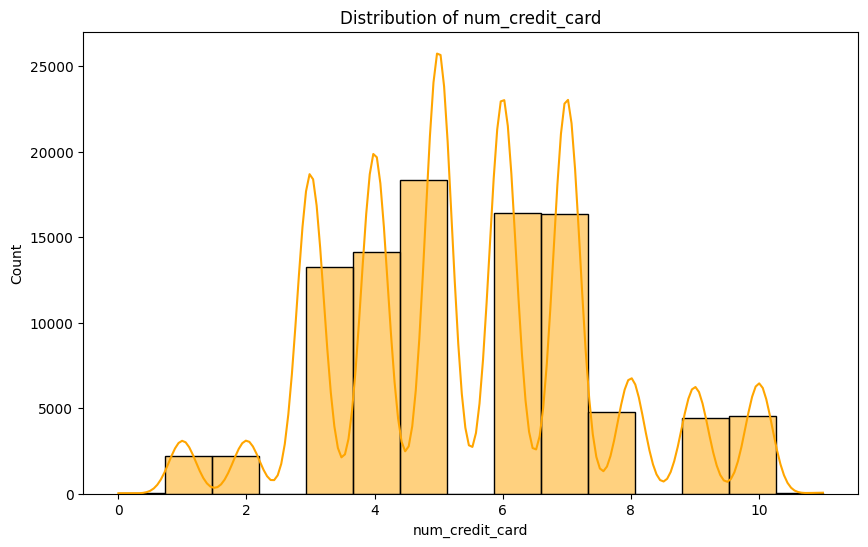

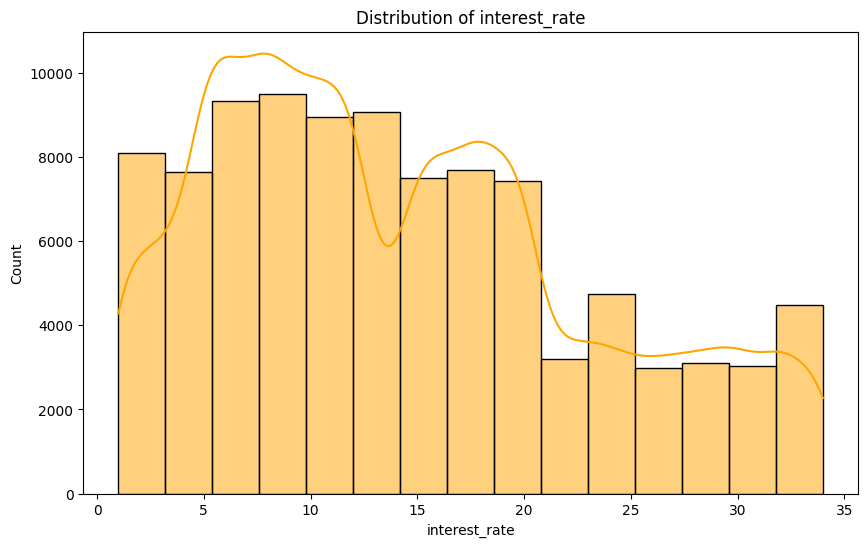

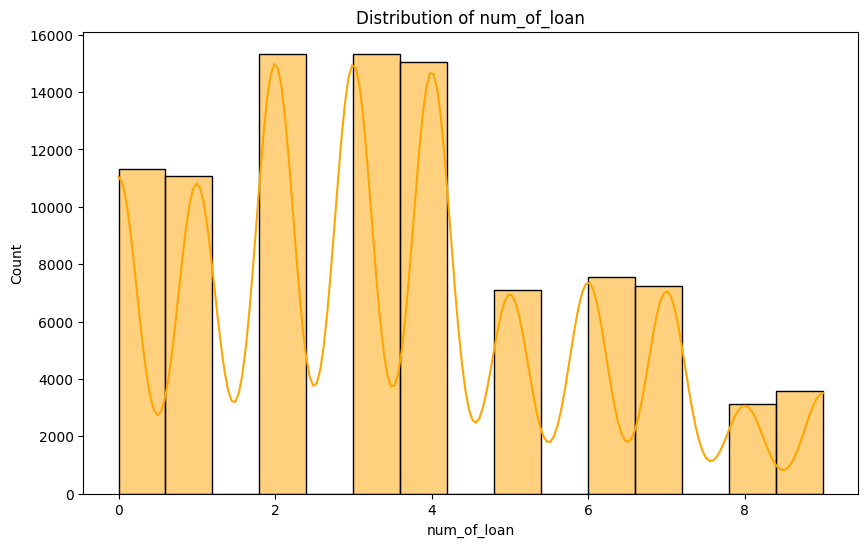

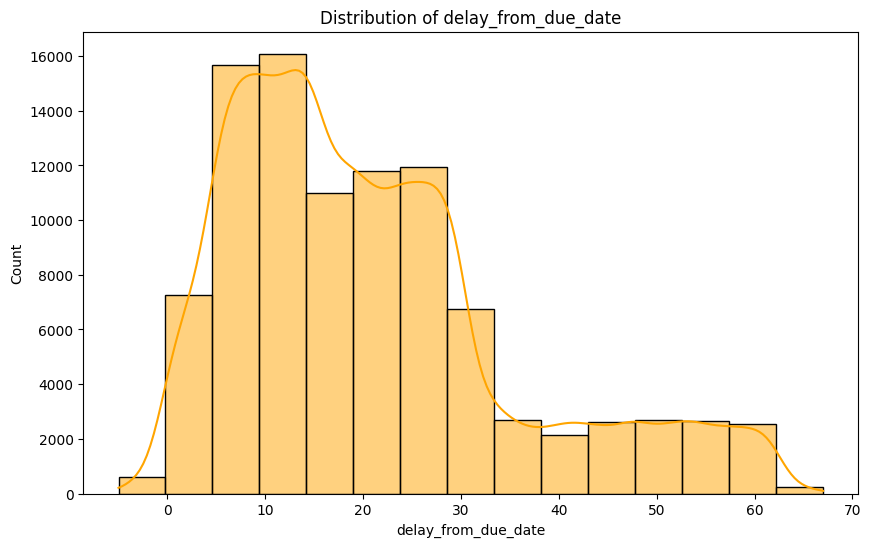

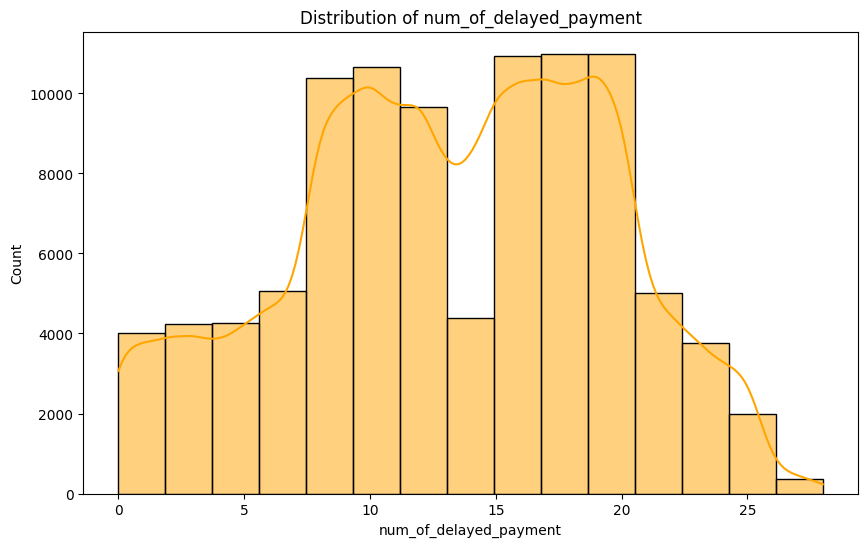

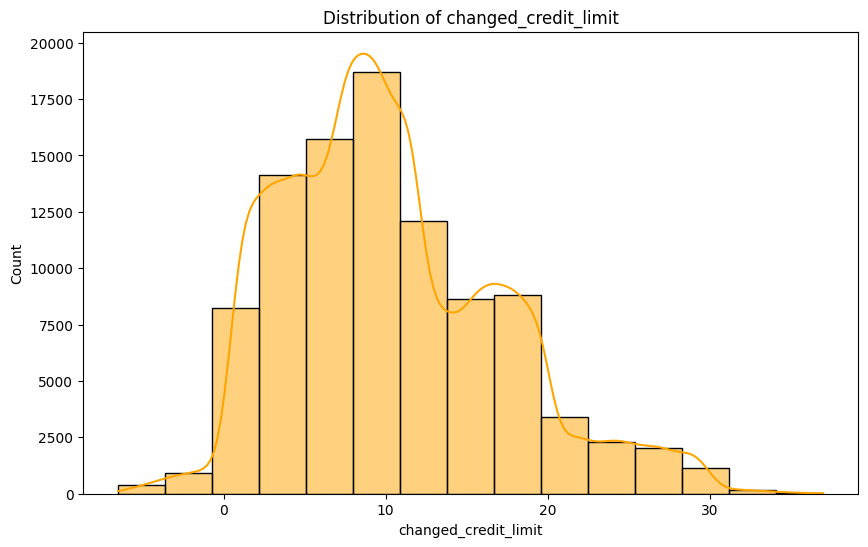

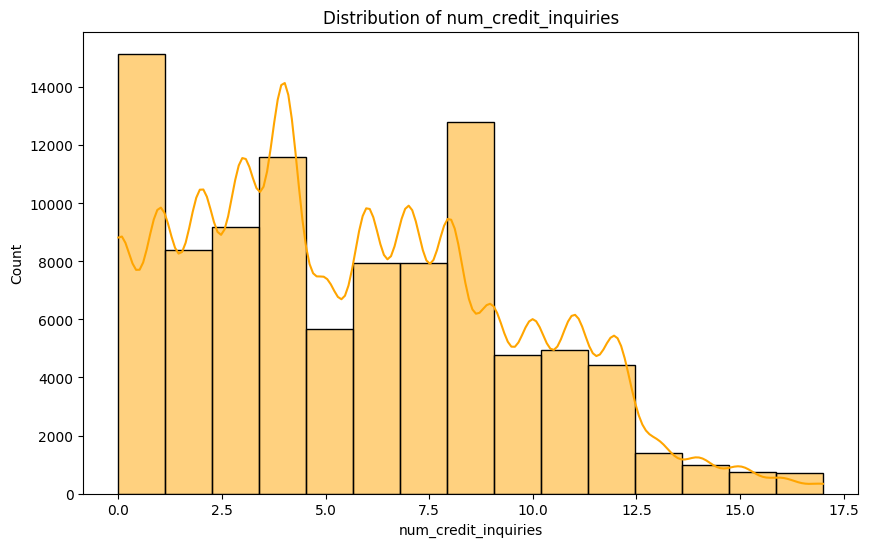

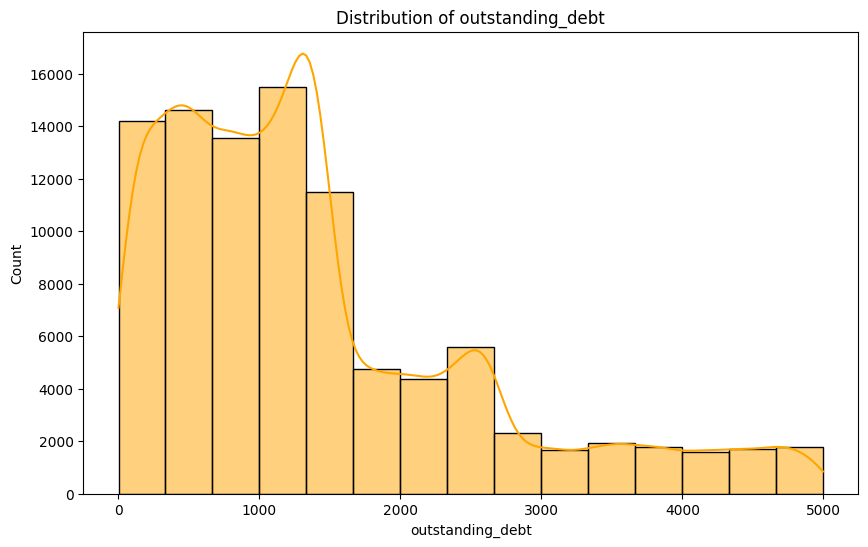

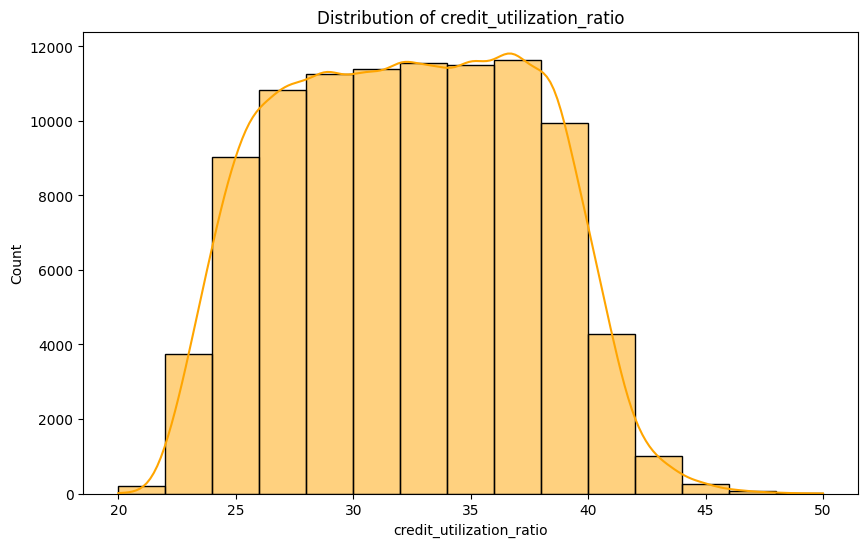

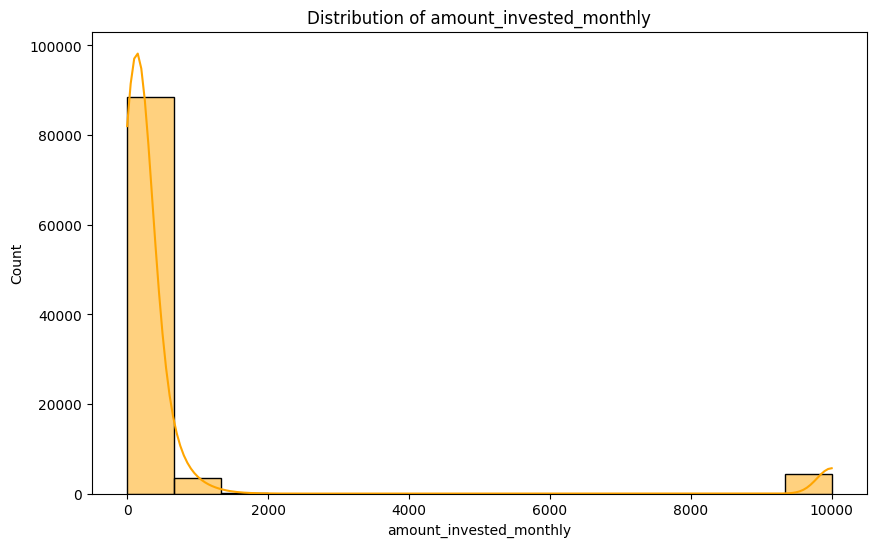

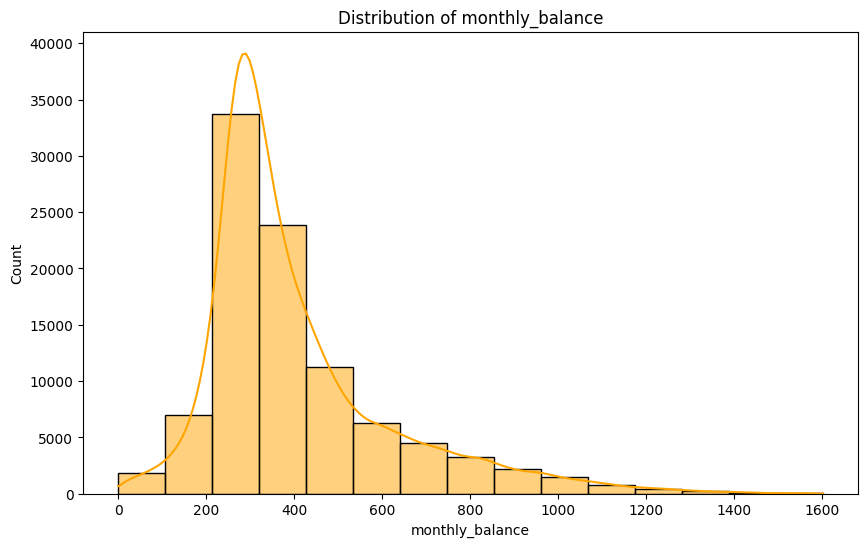

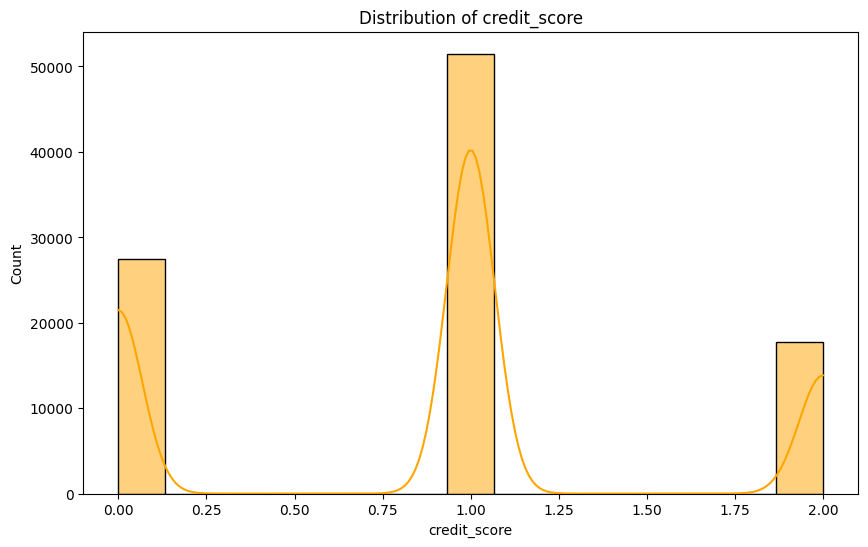

In [24]:
for col in df_numeric.columns:
    # 7. Distribution of Annual Income
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], bins=15, kde=True, color='orange')
    plt.title(f'Distribution of {col}')
    plt.show()

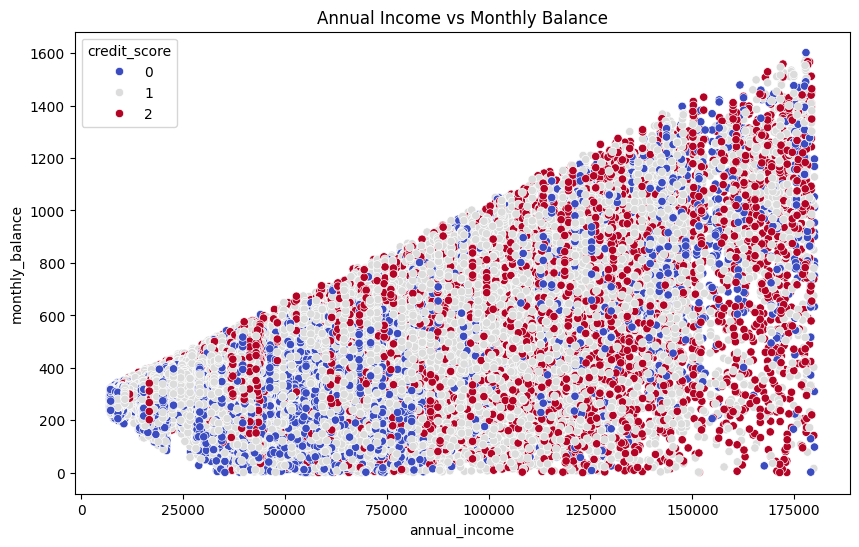

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='annual_income', y='monthly_balance', data=df, hue='credit_score', palette='coolwarm')
plt.title('Annual Income vs Monthly Balance')
plt.show()

## Categorical feature

In [26]:
cat_cols

['id',
 'customer_id',
 'month',
 'name',
 'ssn',
 'occupation',
 'type_of_loan',
 'credit_mix',
 'payment_of_min_amount',
 'payment_behaviour']

In [27]:
df_cat = df[cat_cols].copy()

In [28]:
df_cat.head()

,id,customer_id,month,name,ssn,occupation,type_of_loan,credit_mix,payment_of_min_amount,payment_behaviour
0,0x1602,CUS_0xd40,January,Aaron Maashoh,821-00-0265,Scientist,"['Auto Loan', 'Credit-Builder Loan', 'Personal...",Good,No,High_spent_Small_value_payments
1,0x1603,CUS_0xd40,February,Aaron Maashoh,821-00-0265,Scientist,"['Auto Loan', 'Credit-Builder Loan', 'Personal...",Good,No,Low_spent_Large_value_payments
2,0x1604,CUS_0xd40,March,Aaron Maashoh,821-00-0265,Scientist,"['Auto Loan', 'Credit-Builder Loan', 'Personal...",Good,No,Low_spent_Medium_value_payments
3,0x1605,CUS_0xd40,April,Aaron Maashoh,821-00-0265,Scientist,"['Auto Loan', 'Credit-Builder Loan', 'Personal...",Good,No,Low_spent_Small_value_payments
4,0x1606,CUS_0xd40,May,Aaron Maashoh,821-00-0265,Scientist,"['Auto Loan', 'Credit-Builder Loan', 'Personal...",Good,No,High_spent_Medium_value_payments


In [29]:
df_cat[df_cat['customer_id'] == 'CUS_0xd40'].head(20)

,id,customer_id,month,name,ssn,occupation,type_of_loan,credit_mix,payment_of_min_amount,payment_behaviour
0,0x1602,CUS_0xd40,January,Aaron Maashoh,821-00-0265,Scientist,"['Auto Loan', 'Credit-Builder Loan', 'Personal...",Good,No,High_spent_Small_value_payments
1,0x1603,CUS_0xd40,February,Aaron Maashoh,821-00-0265,Scientist,"['Auto Loan', 'Credit-Builder Loan', 'Personal...",Good,No,Low_spent_Large_value_payments
2,0x1604,CUS_0xd40,March,Aaron Maashoh,821-00-0265,Scientist,"['Auto Loan', 'Credit-Builder Loan', 'Personal...",Good,No,Low_spent_Medium_value_payments
3,0x1605,CUS_0xd40,April,Aaron Maashoh,821-00-0265,Scientist,"['Auto Loan', 'Credit-Builder Loan', 'Personal...",Good,No,Low_spent_Small_value_payments
4,0x1606,CUS_0xd40,May,Aaron Maashoh,821-00-0265,Scientist,"['Auto Loan', 'Credit-Builder Loan', 'Personal...",Good,No,High_spent_Medium_value_payments
5,0x1607,CUS_0xd40,June,Aaron Maashoh,821-00-0265,Scientist,"['Auto Loan', 'Credit-Builder Loan', 'Personal...",Good,No,High_spent_Medium_value_payments
6,0x1608,CUS_0xd40,July,Aaron Maashoh,821-00-0265,Scientist,"['Auto Loan', 'Credit-Builder Loan', 'Personal...",Good,No,Low_spent_Small_value_payments
7,0x1609,CUS_0xd40,August,Aaron Maashoh,821-00-0265,Scientist,"['Auto Loan', 'Credit-Builder Loan', 'Personal...",Good,No,High_spent_Medium_value_payments


id, customer_id - номер отчета и номер человека

/var/folders/96/5q60w2vs6sb74wvvssyfl7f00000gn/T/ipykernel_21657/2938255483.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='occupation', palette='Set2')


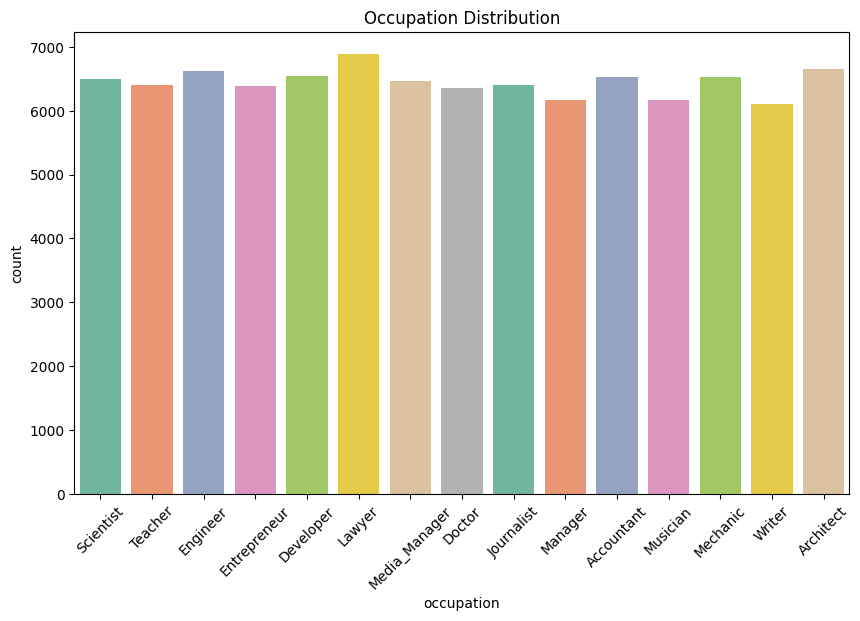

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='occupation', palette='Set2')
plt.title('Occupation Distribution')
plt.xticks(rotation=45)
plt.show()

In [31]:
len(df_cat['type_of_loan'].unique())

5981

In [32]:
uniq_type_loan = []

In [33]:
for el in df_cat['type_of_loan']:
    tmp = el[1:-1].split(",")
    for elem in tmp:
        s = str(elem).strip("'").strip().strip('"').replace('"', '').replace("'", '')
        uniq_type_loan.append(s)

In [34]:
uniq_type_loan[:10]

['Auto Loan',
 'Credit-Builder Loan',
 'Personal Loan',
 'Home Equity Loan',
 'Auto Loan',
 'Credit-Builder Loan',
 'Personal Loan',
 'Home Equity Loan',
 'Auto Loan',
 'Credit-Builder Loan']

In [35]:
uniq_type_loan = list(set(uniq_type_loan))

In [36]:
len(uniq_type_loan)

10

## Data Preparetion

In [37]:
uniq_type_loan

['Not Specified',
 'Auto Loan',
 'Credit-Builder Loan',
 'Debt Consolidation Loan',
 'Payday Loan',
 'No Loan',
 'Personal Loan',
 'Student Loan',
 'Home Equity Loan',
 'Mortgage Loan']

In [38]:
def return_type_of_loan(x):
    res = [0] * 10
    for i, col in enumerate(uniq_type_loan):
        if col in x:
            res[i] = 1

    return np.array(res)

In [39]:
df_clear = df.copy()

In [40]:
df_clear['type_of_loan_encode'] = df['type_of_loan'].apply(lambda x: return_type_of_loan(x))

In [41]:
df_clear['type_of_loan_categories'] = [uniq_type_loan] * df_clear.shape[0]

In [42]:
df_exploded = df_clear.explode(['type_of_loan_categories', 'type_of_loan_encode'])

In [43]:
df_exploded.head()

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,credit_history_age,...,credit_mix,outstanding_debt,credit_utilization_ratio,payment_of_min_amount,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score,type_of_loan_encode,type_of_loan_categories
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,89,...,Good,809.98,26.82262,No,80.4153,High_spent_Small_value_payments,312.49408,2,0,Not Specified
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,89,...,Good,809.98,26.82262,No,80.4153,High_spent_Small_value_payments,312.49408,2,1,Auto Loan
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,89,...,Good,809.98,26.82262,No,80.4153,High_spent_Small_value_payments,312.49408,2,1,Credit-Builder Loan
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,89,...,Good,809.98,26.82262,No,80.4153,High_spent_Small_value_payments,312.49408,2,0,Debt Consolidation Loan
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,89,...,Good,809.98,26.82262,No,80.4153,High_spent_Small_value_payments,312.49408,2,0,Payday Loan


In [44]:
df_pivot = df_exploded.pivot(index=['id', 'credit_score'], columns='type_of_loan_categories', values='type_of_loan_encode')

In [45]:
df_pivot.head()

,type_of_loan_categories,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,No Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
id,credit_score,,,,,,,,,,
0x10002,0,0,0,0,0,0,0,0,0,1,0
0x10003,0,0,0,0,0,0,0,0,0,1,0
0x10004,0,0,0,0,0,0,0,0,0,1,0
0x10005,0,0,0,0,0,0,0,0,0,1,0
0x10006,0,0,0,0,0,0,0,0,0,1,0


In [46]:
df_final = df_pivot.reset_index()

In [47]:
df_clear = df.copy()

In [48]:
df_clear = pd.merge(df_clear, df_final, on=['id', 'credit_score'])

In [49]:
df_clear.shape

(96696, 38)

In [50]:
df_clear.head()

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,credit_history_age,...,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,No Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,89,...,1,1,0,1,0,0,0,0,1,0
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,93,...,1,1,0,1,0,0,0,0,1,0
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,91,...,1,1,0,1,0,0,0,0,1,0
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,92,...,1,1,0,1,0,0,0,0,1,0
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,93,...,1,1,0,1,0,0,0,0,1,0


In [51]:
cat_cols

['id',
 'customer_id',
 'month',
 'name',
 'ssn',
 'occupation',
 'type_of_loan',
 'credit_mix',
 'payment_of_min_amount',
 'payment_behaviour']

In [52]:
ohe = OneHotEncoder()

In [53]:
df_clear['month'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August'], dtype=object)

In [54]:
dict_month = {'January' : 1, 'February' : 2, 'March' : 3, 'April' : 4, 'May' : 5, 'June' : 6, 'July' : 7,
       'August' : 8}

In [55]:
df_clear['month'] = df_clear['month'].apply(lambda x: dict_month[x])

In [56]:
df_clear.head()

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,credit_history_age,...,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,No Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,89,...,1,1,0,1,0,0,0,0,1,0
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,93,...,1,1,0,1,0,0,0,0,1,0
2,0x1604,CUS_0xd40,3,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,91,...,1,1,0,1,0,0,0,0,1,0
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,92,...,1,1,0,1,0,0,0,0,1,0
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,93,...,1,1,0,1,0,0,0,0,1,0


In [57]:
df_clear = df_clear.drop(columns=['type_of_loan'])

In [58]:
cat_cols = ['id',
 'customer_id',
 'name',
 'ssn',
 'occupation',
 'credit_mix',
 'payment_of_min_amount',
 'payment_behaviour']

In [59]:
numeric_cols = df_numeric.columns

## Переводим к лейблам категориальные фичи

In [60]:
for col in cat_cols:
    encoder = LabelEncoder()
    df_clear[col] = encoder.fit_transform(df_clear[col])

## Отстандартизируем числовые фичи

In [61]:
df_final = df_clear.copy()

In [62]:
numeric_cols = numeric_cols[:-1]

In [63]:
numeric_cols

Index(['age', 'annual_income', 'monthly_inhand_salary', 'credit_history_age',
       'total_emi_per_month', 'num_bank_accounts', 'num_credit_card',
       'interest_rate', 'num_of_loan', 'delay_from_due_date',
       'num_of_delayed_payment', 'changed_credit_limit',
       'num_credit_inquiries', 'outstanding_debt', 'credit_utilization_ratio',
       'amount_invested_monthly', 'monthly_balance'],
      dtype='object')

In [64]:
encoder = StandardScaler()
df_final[numeric_cols]  = encoder.fit_transform(df_clear[numeric_cols])

In [65]:
for col in uniq_type_loan:
    df_final[col] = df_final[col].astype(int)

In [66]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96696 entries, 0 to 96695
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        96696 non-null  int64  
 1   customer_id               96696 non-null  int64  
 2   month                     96696 non-null  int64  
 3   name                      96696 non-null  int64  
 4   age                       96696 non-null  float64
 5   ssn                       96696 non-null  int64  
 6   occupation                96696 non-null  int64  
 7   annual_income             96696 non-null  float64
 8   monthly_inhand_salary     96696 non-null  float64
 9   credit_history_age        96696 non-null  float64
 10  total_emi_per_month       96696 non-null  float64
 11  num_bank_accounts         96696 non-null  float64
 12  num_credit_card           96696 non-null  float64
 13  interest_rate             96696 non-null  float64
 14  num_of

## Cross Validation

In [67]:
train_X, test_X, train_y, test_y = train_test_split(df_final.drop(columns=['credit_score']),df_final['credit_score'], test_size=0.2, random_state=42)

In [67]:
parametrs = {'n_neighbors' : [3, 5, 7, 9, 11], 'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']}

In [68]:
model = KNeighborsClassifier()

In [70]:
clf = GridSearchCV(model, parametrs, cv=3, scoring='accuracy', return_train_score=False,n_jobs=-1, verbose=1)

In [71]:
clf.fit(train_X, train_y)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [72]:
best_model = clf.best_estimator_

In [73]:
predict = best_model.predict(test_X)

In [74]:
print(f"accuracy_score на test: {accuracy_score(test_y, predict)}")

print(f"f1_score на test: {f1_score(test_y, predict, average="macro")}")
print(f"f1_score на test: {f1_score(test_y, predict, average="micro")}")

accuracy_score на test: 0.8286452947259566
f1_score на test: 0.8236774229346179
f1_score на test: 0.8286452947259566


## Линейная модель

In [75]:
logreg = LogisticRegression(penalty='l2', max_iter=500)

In [76]:
logreg.fit(train_X, train_y, )

/Users/dmitry/Desktop/project/pinn_venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [77]:
pred_log = logreg.predict(test_X)

In [78]:
print(f"accuracy_score на test: {accuracy_score(test_y, pred_log)}")

print(f"f1_score на test: {f1_score(test_y, pred_log, average="macro")}")
print(f"f1_score на test: {f1_score(test_y, pred_log, average="micro")}")

accuracy_score на test: 0.6144777662874871
f1_score на test: 0.5688073603506695
f1_score на test: 0.6144777662874871


In [79]:
logreg = LogisticRegression(penalty='l2', max_iter=500)

In [80]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, ],
    'solver': ['liblinear', 'saga', 'lbfgs']
}

# GridSearch для подбора гиперпараметров
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid,
                           cv=3, scoring='accuracy', n_jobs=-1)

# Обучение модели с подбором гиперпараметров
grid_search.fit(train_X, train_y)

/Users/dmitry/Desktop/project/pinn_venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/dmitry/Desktop/project/pinn_venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=500), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga', 'lbfgs']},
             scoring='accuracy')

In [81]:
best_logreg = grid_search.best_estimator_

In [82]:
pred_bestlog = best_logreg.predict(test_X)

In [83]:
print(f"accuracy_score на test: {accuracy_score(test_y, pred_bestlog)}")

print(f"f1_score на test: {f1_score(test_y, pred_bestlog, average="macro")}")
print(f"f1_score на test: {f1_score(test_y, pred_bestlog, average="micro")}")

accuracy_score на test: 0.6452947259565667
f1_score на test: 0.6128249614231153
f1_score на test: 0.6452947259565667


## Desicion Tree

In [84]:
tree = DecisionTreeClassifier(random_state=42)

In [85]:
tree.fit(train_X, train_y)

DecisionTreeClassifier(random_state=42)

In [86]:
predict_tree = tree.predict(test_X)

In [87]:
print(f"accuracy_score на test: {accuracy_score(test_y, predict_tree)}")

print(f"f1_score на test: {f1_score(test_y, predict_tree, average="macro")}")
print(f"f1_score на test: {f1_score(test_y, predict_tree, average="micro")}")

accuracy_score на test: 0.7544984488107549
f1_score на test: 0.739251421785204
f1_score на test: 0.7544984488107549


In [88]:
tree = DecisionTreeClassifier(random_state=42)

In [89]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [90]:
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)


In [91]:
grid_search.fit(train_X, train_y)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   2.6s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   2.8s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   2.8s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   2.8s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   2.9s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   3.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   2.9s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   2.9s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=2; total time=   3.0s
[CV] END criterion=gini, ma

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=2)

In [92]:
print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая точность на обучении:", grid_search.best_score_)

Лучшие параметры: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Лучшая точность на обучении: 0.7347070466375435


In [93]:
best_model_tree = grid_search.best_estimator_


In [94]:
predict_besttree = best_model_tree.predict(test_X)

In [95]:
print(f"accuracy_score на test: {accuracy_score(test_y, predict_besttree)}")

print(f"f1_score на test: {f1_score(test_y, predict_besttree, average="macro")}")
print(f"f1_score на test: {f1_score(test_y, predict_besttree, average="micro")}")

accuracy_score на test: 0.7544984488107549
f1_score на test: 0.739251421785204
f1_score на test: 0.7544984488107549


## RandomForest

In [96]:
rf = RandomForestClassifier(random_state=42)

In [97]:
rf.fit(train_X, train_y)
predict_rf = rf.predict(test_X)

print(f"accuracy_score на test: {accuracy_score(test_y, predict_rf)}")

print(f"f1_score на test: {f1_score(test_y, predict_rf, average="macro")}")
print(f"f1_score на test: {f1_score(test_y, predict_rf, average="micro")}")

accuracy_score на test: 0.8367631851085833
f1_score на test: 0.8310656006557661
f1_score на test: 0.8367631851085833


In [98]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

grid_search.fit(train_X, train_y)

print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая точность на обучении:", grid_search.best_score_)

best_model_rf = grid_search.best_estimator_

Fitting 3 folds for each of 324 candidates, totalling 972 fits
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  20.6s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  20.7s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  20.7s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  37.6s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=  16.9s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=  17.0s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=

/Users/dmitry/Desktop/project/pinn_venv/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 1.3min
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 1.3min
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=  18.8s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=  18.9s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=  19.4s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 1.3min
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 1.3min
[CV] END bootstrap=False, m

In [99]:
predict_best_rf = best_model_rf.predict(test_X)

print(f"accuracy_score на test: {accuracy_score(test_y, predict_best_rf)}")

print(f"f1_score на test: {f1_score(test_y, predict_best_rf, average="macro")}")
print(f"f1_score на test: {f1_score(test_y, predict_best_rf, average="micro")}")

accuracy_score на test: 0.8415201654601862
f1_score на test: 0.8364601482870007
f1_score на test: 0.8415201654601862


## GradientBoosting

In [100]:
gb = GradientBoostingClassifier(random_state=42)

gb.fit(train_X, train_y)
predict_gb = gb.predict(test_X)

print(f"accuracy_score на test: {accuracy_score(test_y, predict_gb)}")

print(f"f1_score на test: {f1_score(test_y, predict_gb, average="macro")}")
print(f"f1_score на test: {f1_score(test_y, predict_gb, average="micro")}")

accuracy_score на test: 0.7228541882109617
f1_score на test: 0.7032773190299065
f1_score на test: 0.7228541882109617


In [101]:
model = GradientBoostingClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

grid_search.fit(train_X, train_y)

print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая точность на обучении:", grid_search.best_score_)

best_model_gb = grid_search.best_estimator_

Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=0.8; total time=  30.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=0.8; total time=  30.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=0.8; total time=  30.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=1.0; total time=  36.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=1.0; total time=  36.4s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=1.0; total time=  36.6s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.8; total time= 1.0min

In [102]:
predict_best_gb = best_model_gb.predict(test_X)

print(f"accuracy_score на test: {accuracy_score(test_y, predict_best_gb)}")

print(f"f1_score на test: {f1_score(test_y, predict_best_gb, average="macro")}")
print(f"f1_score на test: {f1_score(test_y, predict_best_gb, average="micro")}")

accuracy_score на test: 0.7487590486039297
f1_score на test: 0.7315237012463042
f1_score на test: 0.7487590486039297


## Implementation

In [68]:
def pipeline(models, train_X, train_y, test_X, test_y):

  results = {}

  for model_name, model in models.items():
          print(f"Training and evaluating model: {model_name}")

          model.fit(train_X, train_y)

          y_pred = model.predict(test_X)

          acc = accuracy_score(test_y, y_pred)
          f1 = f1_score(test_y, y_pred, average="weighted")

          results[model_name] = {"accuracy": acc, "f1_score": f1}
          print(f"  Accuracy: {acc:.4f}")
          print(f"  F1 Score: {f1:.4f}\n")

  return results

In [69]:
knn = KNN(k=5, task="classification")
logreg = LogisticRegression(lr=0.01, n_iters=1000, task="classification")
decision_tree = DecisionTree(max_depth=5, task="classification")
random_forest = RandomForest(n_trees=10, max_depth=5, task="classification")
gradient_boosting = GradientBoosting(n_estimators=50, learning_rate=0.1, max_depth=3, task="classification")

# Словарь моделей для пайплайна
models = {
    "KNN": knn,
    "Logistic Regression": logreg,
    "Decision Tree": decision_tree,
    "Random Forest": random_forest,
    "Gradient Boosting": gradient_boosting,
}

In [70]:
results = pipeline(models, train_X.values, train_y.values, test_X.values, test_y.values)

Training and evaluating model: KNN
  Accuracy: 0.7994
  F1 Score: 0.7995

Training and evaluating model: Logistic Regression


/Users/dmitry/Desktop/project/impementation.py:142: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


  Accuracy: 0.5337
  F1 Score: 0.3714

Training and evaluating model: Decision Tree
  Accuracy: 0.7123
  F1 Score: 0.7133

Training and evaluating model: Random Forest
  Accuracy: 0.7124
  F1 Score: 0.7134

Training and evaluating model: Gradient Boosting
  Accuracy: 0.6457
  F1 Score: 0.5765



In [71]:
print("\nFinal Results:")
for model_name, metrics in results.items():
    print(f"{model_name}: Accuracy = {metrics['accuracy']:.4f}, F1 Score = {metrics['f1_score']:.4f}")


Final Results:
KNN: Accuracy = 0.7994, F1 Score = 0.7995
Logistic Regression: Accuracy = 0.5337, F1 Score = 0.3714
Decision Tree: Accuracy = 0.7123, F1 Score = 0.7133
Random Forest: Accuracy = 0.7124, F1 Score = 0.7134
Gradient Boosting: Accuracy = 0.6457, F1 Score = 0.5765
